In [333]:
%matplotlib inline

In [334]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
from  time import sleep
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
from mpl_toolkits.basemap import Basemap
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data
import re
from ipywidgets import interact, interactive, fixed, interact_manual, Checkbox
import ipywidgets as widgets
from IPython.display import display
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from  matplotlib import cm

<h3 align="center">Recolhendo as Funções do Receptor</h3>

In [335]:
STA = ['BDCO','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

In [336]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/syngine_filtered/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

datalistt = []
datalistSt = []
dir_listt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/syngine_filtered/'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            datalistt.append(os.path.join(root, datafile))
datalistSt = sorted(datalistt)

In [337]:
a1r = []
a25r = []
a05r = []

for i,j in enumerate(datalistSr):
    if 'a=1.0' in j:
        a1r.append(j)
    elif 'a=2.5' in j:
        a25r.append(j)
    else:
        a05r.append(j)
        
a1t = []
a25t = []
a05t = []
for i,j in enumerate(datalistSt):
    if 'a=1.0' in j:
        a1t.append(j)
    elif 'a=2.5' in j:
        a25t.append(j)
    else:
        a05t.append(j)

In [338]:
a1r_name = [i.split('/')[12] for i in a1r]
a1t_name = [i.split('/')[12] for i in a1t]
a25r_name = [i.split('/')[12] for i in a25r]
a25t_name = [i.split('/')[12] for i in a25t]
a05r_name = [i.split('/')[12] for i in a05r]
a05t_name = [i.split('/')[12] for i in a05t]

In [339]:
RF_list_r = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r[l].append(j)
            
RF_list_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_25[l].append(j)
            
RF_list_r_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a05r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_05[l].append(j)

<h3 align="center">Separando as Funções do Receptor por Estação</h3>

In [340]:
RF_list_t = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t[l].append(j)
            
RF_list_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_25[l].append(j)
            
RF_list_t_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a05t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_05[l].append(j)

<h3 align="center">Separando as Funções do Receptor pela distância Epicentral (gcarc)</h3>

BDCO = 0, BPPF = 1 ,BUCO = 2, GENI = 3, GRJU = 4, PRDT = 5, STNS = 6, STSR = 7, TRZN = 8

In [341]:
z = 2

<h3 align="center">a = 1.0</h3>

In [342]:
RF = []
RF_name_r = []

for i,j in enumerate(RF_list_r[z]):
    RF += op.read(j)
    RF_name_r.append(j.split('/')[-1])

In [343]:
RF_name = [i.split('.eqr')[0] for i in RF_name_r]

In [344]:
TF = []
for i,j in enumerate(RF_list_t[z]):
    TF += op.read(j)

<h3 align="center">a = 2.5</h3>

In [345]:
RF_25 = []
RF_name_r_25 = []

for i,j in enumerate(RF_list_r_25[z]):
    RF_25 += op.read(j)
    RF_name_r_25.append(j.split('/')[-1])

In [346]:
TF_25 = []
for i,j in enumerate(RF_list_t_25[z]):
    TF_25 += op.read(j)

<h3 align="center">a = 0.5</h3>

In [347]:
RF_05 = []
RF_name_r_05 = []

for i,j in enumerate(RF_list_r_05[z]):
        RF_05 += op.read(j)
        RF_name_r_05.append(j.split('/')[-1])

In [348]:
TF_05 = []
for i,j in enumerate(RF_list_t_05[z]):
    TF_05 += op.read(j)

<h3 align="center">Separando as Funções do Receptor pela porcentagem da deconvolução</h3>

<h3 align="center">a = 1.0</h3>

In [349]:
RF_30_st = op.Stream()
RF_30 = []
TF_30 = []
for i,j in enumerate(RF):
        RF_30_st.append(j)
        TF_30.append(TF[i])

In [350]:
for i,j in enumerate(RF_30_st):
    RF_30.append(j)

In [351]:
len(RF_30_st)

29

<h3 align="center">a = 2.5</h3>

In [352]:
RF_30_25_st = op.Stream()
RF_30_25 = []
TF_30_25 = []
for i,j in enumerate(RF_25):
        RF_30_25_st.append(j)
        TF_30_25.append(TF_25[i])

In [353]:
for i,j in enumerate(RF_30_25_st):
    RF_30_25.append(j)

In [354]:
len(RF_30_25)

28

<h3 align="center">a = 0.5</h3>

In [355]:
RF_30_05_st = op.Stream()
RF_30_05 = []
TF_30_05 = []
for i,j in enumerate(RF_05):
        RF_30_05_st.append(j)
        TF_30_05.append(TF_05[i])

In [356]:
for i,j in enumerate(RF_30_05_st):
    RF_30_05.append(j)

In [357]:
len(RF_30_05)

39

<h3 align="center">Plotando as Funções do Receptor</h3>

<h3 align="center">a = 1.0</h3>

In [358]:
RFgcarc_30 = [i.stats.sac.gcarc for i in RF_30]
RFevdp_30 = [i.stats.sac.evdp for i in RF_30]
RFbaz_30 = [i.stats.sac.baz for i in RF_30]
RFp_30 = [i.stats.sac.user8 for i in RF_30]

orglisl_30 = np.argsort(RFp_30)

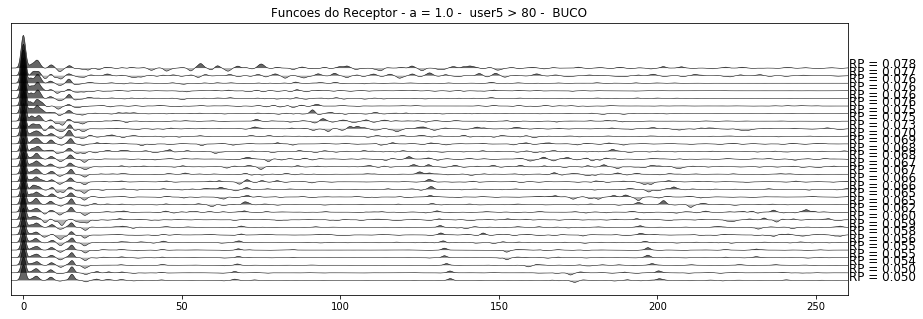

In [359]:
factor = 10
plt.figure(figsize = (15,5))
for j, i in enumerate(orglisl_30): 
    #plt.plot(TF_30[i].times()-10,j/factor+TF_30[i].data,'r',linewidth=0.7)
    plt.plot(RF_30[i].times()-10,j/factor+RF_30[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30[i].times()-10,j/factor+RF_30[i].data,j/factor,where=(j/factor+RF_30[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30[i].times()-10,j/factor+RF_30[i].data,j/factor,where=(j/factor+RF_30[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    plt.text(260.5,j/factor,"RP = "+"{0:.3f}".format(RFp_30[i]),fontsize=12)
    #plt.text(40.5,j/factor,'BAZ = %s' % (RFbaz_30[i]),fontsize=7)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 -  user5 > 80 -  '+STA[z])
    plt.xlim(-4,260)



<h3 align="center">a = 2.5</h3>

In [360]:
RFgcarc_30_25 = [i.stats.sac.gcarc for i in RF_30_25]
RFevdp_30_25 = [i.stats.sac.evdp for i in RF_30_25]
RFbaz_30_25 = [i.stats.sac.baz for i in RF_30_25]
RFp_30_25 = [i.stats.sac.user8 for i in RF_30_25]

orglisl_30_25 = np.argsort(RFp_30_25)

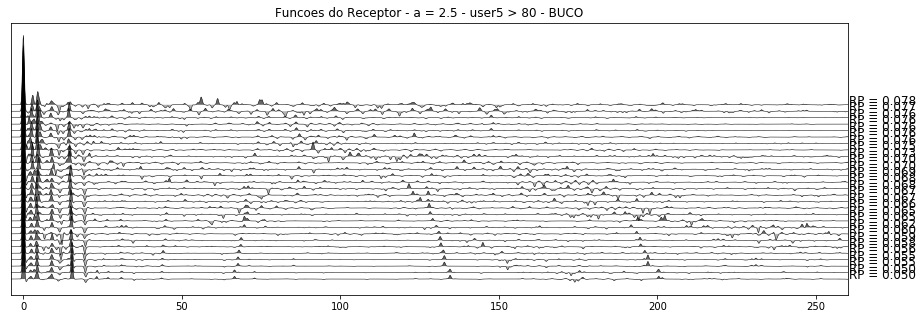

In [361]:
factor = 10
plt.figure(figsize = (15,5))
for j, i in enumerate(orglisl_30_25): 
    #plt.plot(TF_30_25[i].times()-10,j/factor+TF_30_25[i].data,'r',linewidth=0.7)
    plt.plot(RF_30_25[i].times()-10,j/factor+RF_30_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30_25[i].times()-10,j/factor+RF_30_25[i].data,j/factor,where=(j/factor+RF_30_25[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30_25[i].times()-10,j/factor+RF_30_25[i].data,j/factor,where=(j/factor+RF_30_25[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    plt.text(260.5,j/factor,"RP = "+"{0:.3f}".format(RFp_30_25[i]),fontsize=12)
    #plt.text(260.5,j/factor,'BAZ = %s' % (RFbaz_30_25[i]),fontsize=12)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - user5 > 80 - '+STA[z])
    plt.xlim(-4,260)

<h3 align="center">a = 0.5</h3>

In [362]:
RFgcarc_30_05 = [i.stats.sac.gcarc for i in RF_30_05]
RFevdp_30_05 = [i.stats.sac.evdp for i in RF_30_05]
RFbaz_30_05 = [i.stats.sac.baz for i in RF_30_05]
RFp_30_05 = [i.stats.sac.user8 for i in RF_30_05]

orglisl_30_05 = np.argsort(RFp_30_05)

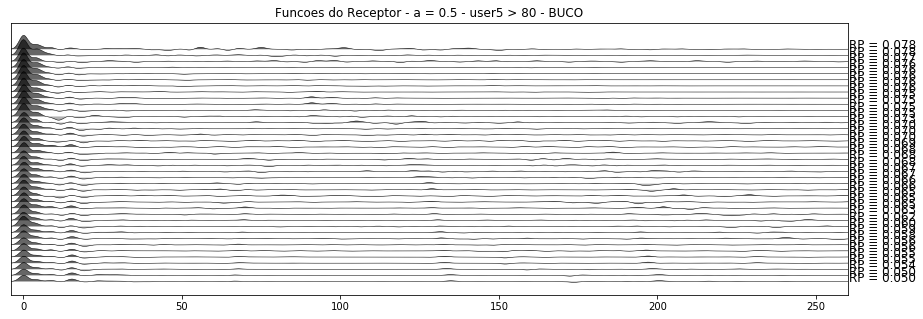

In [363]:
factor = 10
plt.figure(figsize = (15,5))
for j, i in enumerate(orglisl_30_05): 
    #plt.plot(TF_30_05[i].times()-10,j/factor+TF_30_05[i].data,'r',linewidth=0.7)
    plt.plot(RF_30_05[i].times()-10,j/factor+RF_30_05[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30_05[i].times()-10,j/factor+RF_30_05[i].data,j/factor,where=(j/factor+RF_30_05[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30_05[i].times()-10,j/factor+RF_30_05[i].data,j/factor,where=(j/factor+RF_30_05[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30_05[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30_05[i]),fontsize=12)
    plt.text(260.5,j/factor,"RP = "+"{0:.3f}".format(RFp_30_05[i]),fontsize=12)
    #plt.text(260.5,j/factor,'BAZ = %s' % (RFbaz_30_05[i]),fontsize=12)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 0.5 - user5 > 80 - '+STA[z])
    plt.xlim(-4,260)

<h3 align="center">Plotando os Empilhamentos das Funções do Receptor</h3>

<h3 align="center">a = 1.0</h3>

In [364]:
RF_stack_30_final = np.array(RF_30).sum(axis=0)/len(RF_30)

In [365]:
RFT_stack_30_final = np.array(TF_30).sum(axis=0)/len(TF_30)

In [366]:
RF_stack_30_final_user8 = sum([i.stats.sac.user8 for i in RF_30])/len(RF_30)

In [367]:
y_30_final = []
for i,j in enumerate(RF_30): 
    y_30_final.append(j.data)

In [368]:
min_y_30_final = [min(a) for a in zip(*y_30_final)]
max_y_30_final = [max(a) for a in zip(*y_30_final)]

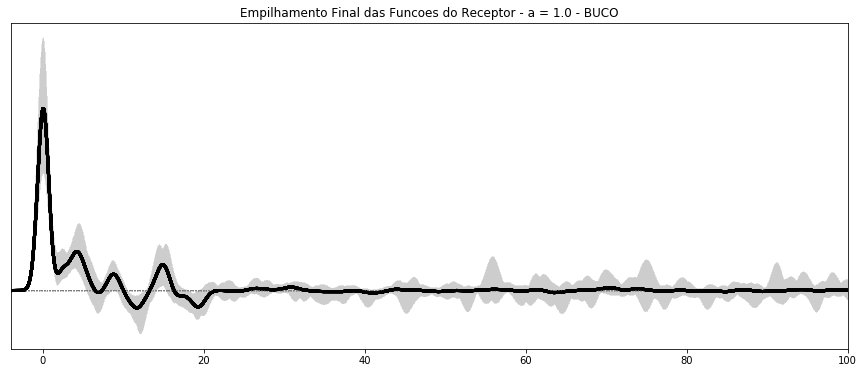

In [369]:
plt.figure(figsize = (15,6))
for j, i in enumerate(RF_30): 
    plt.plot(RF[1].times()-10,RFT_stack_30_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_final,'k',linewidth=3)
    plt.fill_between(RF_30[0].times()-10,min_y_30_final,max_y_30_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,100)

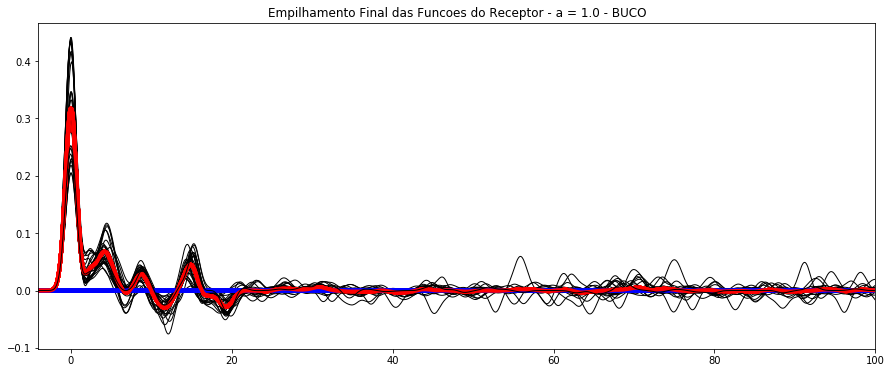

In [370]:
plt.figure(figsize = (15,6))
for j, i in enumerate(RF_30): 
    plt.plot(RF[1].times()-10,RFT_stack_30_final,'b',linewidth=4)
    plt.plot(RF[1].times()-10,RF_stack_30_final,'r',linewidth=4)
    plt.plot(RF[1].times()-10,i.data,'k',linewidth=1)
    #plt.fill_between(RFRbom_30[0].times()-10,min_y_30_final,max_y_30_final,alpha=0.01, facecolor='grey',interpolate=True)
    #plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,100)

<h3 align="center">a = 2.5 </h3>

In [371]:
RF_stack_30_25_final = np.array(RF_30_25).sum(axis=0)/len(RF_30_25)

In [372]:
RFT_stack_30_25_final = np.array(TF_30_25).sum(axis=0)/len(TF_30_25)

In [373]:
RF_stack_30_25_final_user8 = sum([i.stats.sac.user8 for i in RF_30_25])/len(RF_30_25)

In [374]:
y_30_25_final = []
for i,j in enumerate(RF_30_25): 
    y_30_25_final.append(j.data)

In [375]:
min_y_30_25_final = [min(a) for a in zip(*y_30_25_final)]
max_y_30_25_final = [max(a) for a in zip(*y_30_25_final)]

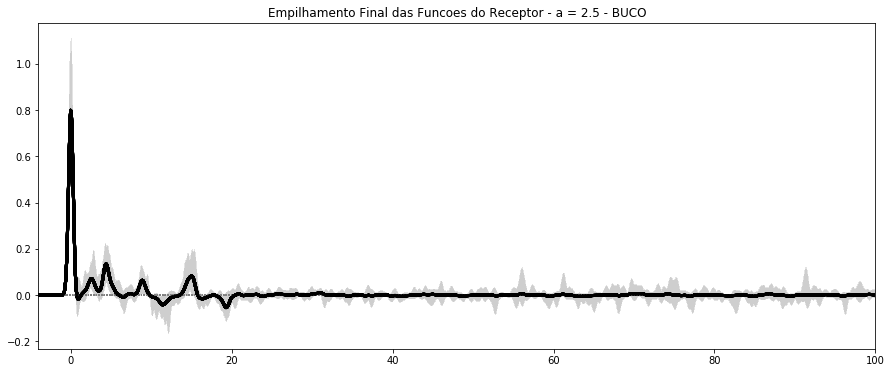

In [376]:
plt.figure(figsize = (15,6))
for j, i in enumerate(RF_30_25): 
    plt.plot(RF[1].times()-10,RFT_stack_30_25_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_25_final,'k',linewidth=3)
    plt.fill_between(RF_30_25[0].times()-10,min_y_30_25_final,max_y_30_25_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,100)

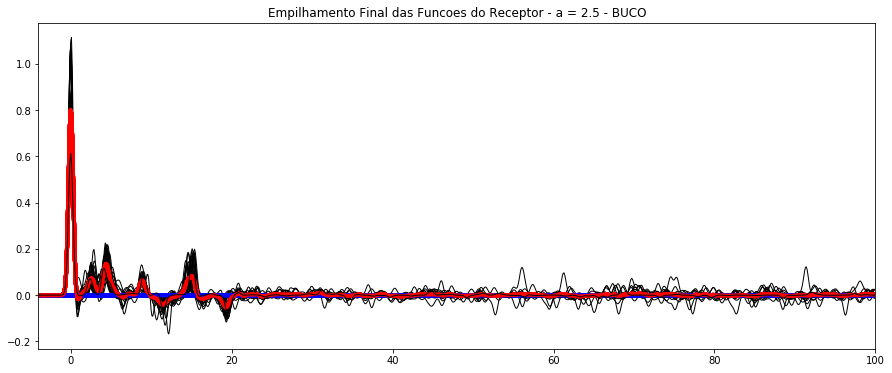

In [377]:
plt.figure(figsize = (15,6))
for j, i in enumerate(RF_30_25): 
    plt.plot(RF[1].times()-10,RFT_stack_30_25_final,'b',linewidth=4)
    plt.plot(RF[1].times()-10,RF_stack_30_25_final,'r',linewidth=4)
    plt.plot(RF[1].times()-10,i.data,'k',linewidth=1)
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,100)

<h3 align="center">a = 0.5 </h3>

In [378]:
RF_stack_30_05_final = np.array(RF_30_05).sum(axis=0)/len(RF_30_05)

In [379]:
RFT_stack_30_05_final = np.array(TF_30_05).sum(axis=0)/len(TF_30_05)

In [380]:
RF_stack_30_05_final_user8 = sum([i.stats.sac.user8 for i in RF_30_05])/len(RF_30_05)

In [381]:
y_30_05_final = []
for i,j in enumerate(RF_30_05): 
    y_30_05_final.append(j.data)

In [382]:
min_y_30_05_final = [min(a) for a in zip(*y_30_05_final)]
max_y_30_05_final = [max(a) for a in zip(*y_30_05_final)]

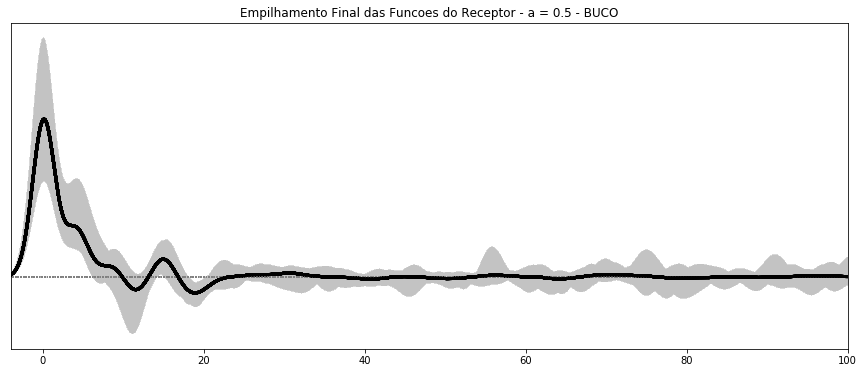

In [383]:
plt.figure(figsize = (15,6))
for j, i in enumerate(RF_30_05): 
    plt.plot(RF[1].times()-10,RFT_stack_30_05_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_05_final,'k',linewidth=3)
    plt.fill_between(RF_30_05[0].times()-10,min_y_30_05_final,max_y_30_05_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 0.5 - '+STA[z])
    plt.xlim(-4,100)

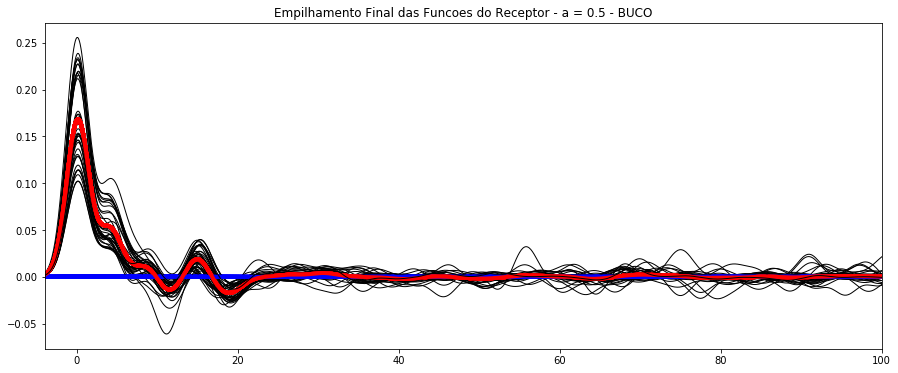

In [384]:
plt.figure(figsize = (15,6))
for j, i in enumerate(RF_30_05): 
    plt.plot(RF[1].times()-10,RFT_stack_30_05_final,'b',linewidth=4)
    plt.plot(RF[1].times()-10,RF_stack_30_05_final,'r',linewidth=4)
    plt.plot(RF[1].times()-10,i.data,'k',linewidth=1)
    #plt.fill_between(RFRbom_30[0].times()-10,min_y_30_final,max_y_30_final,alpha=0.01, facecolor='grey',interpolate=True)
    #plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 0.5 - '+STA[z])
    plt.xlim(-4,100)